In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from glob import glob
import librosa as lr

In [7]:
#set directory for sources file
#data dapat diunduh pada link: https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds
data_dir = './heartbeat/set_a'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

176

# Read and Visualize

In [10]:
#read first audio file, set time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio))/sfreq
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       8.99986395e+00, 8.99990930e+00, 8.99995465e+00])

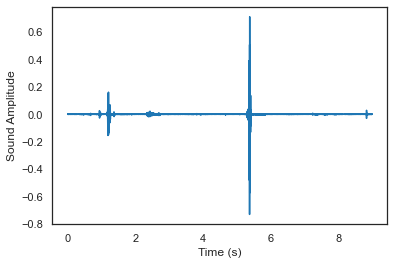

In [11]:
#plot audio over time
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
plt.show()

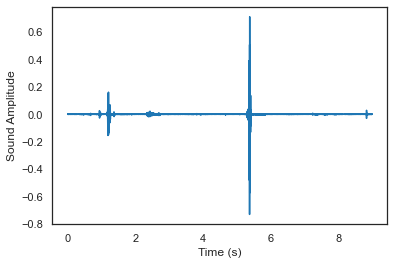

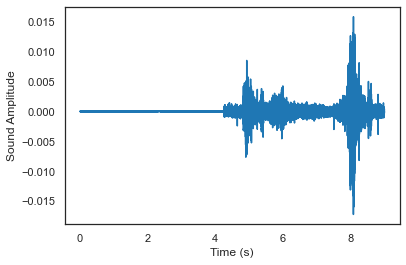

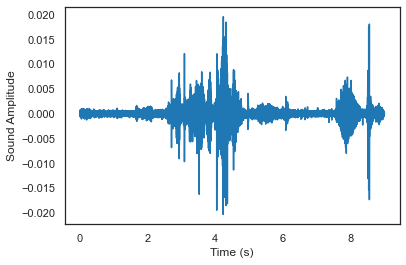

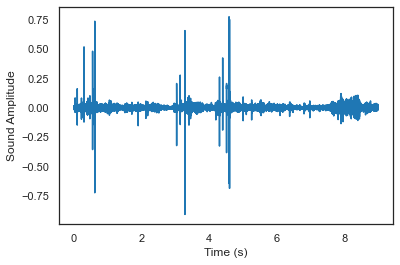

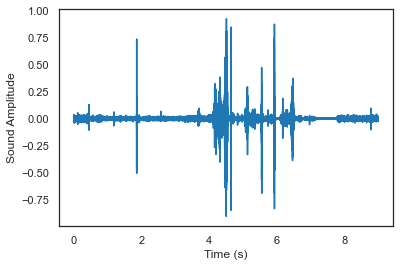

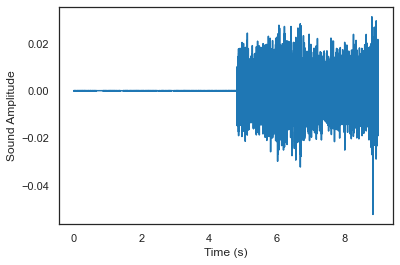

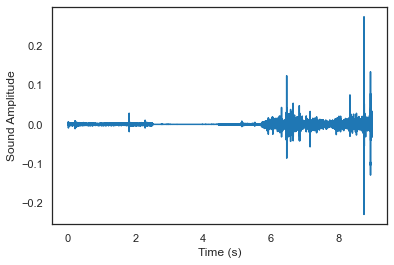

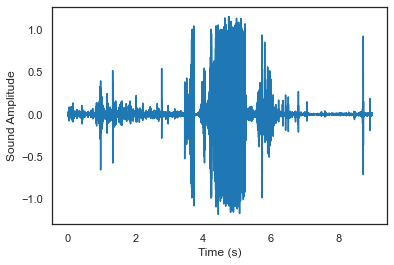

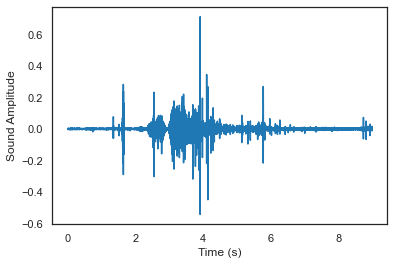

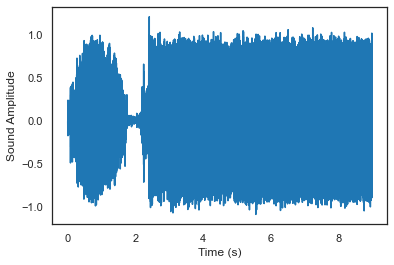

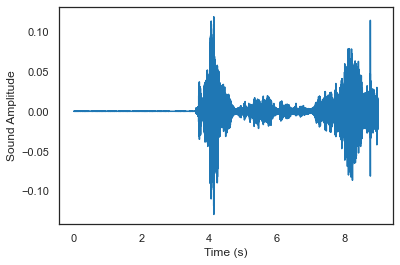

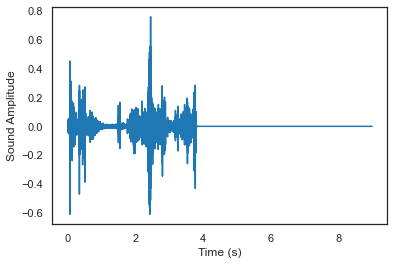

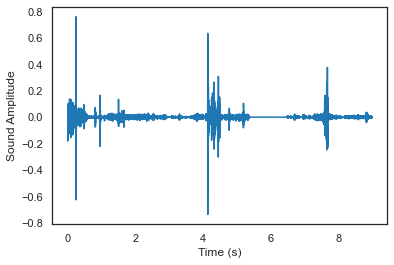

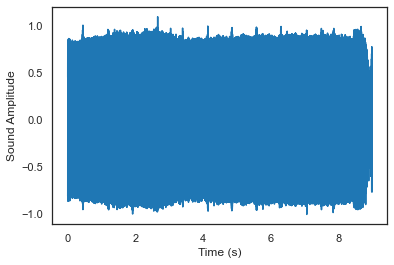

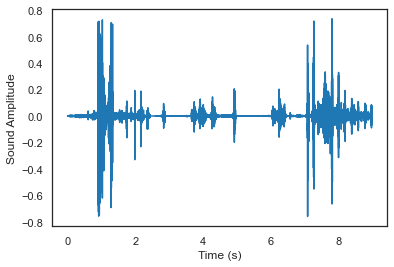

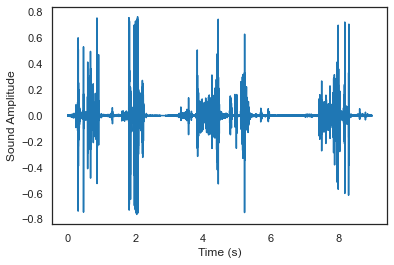

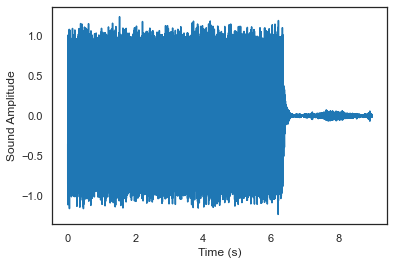

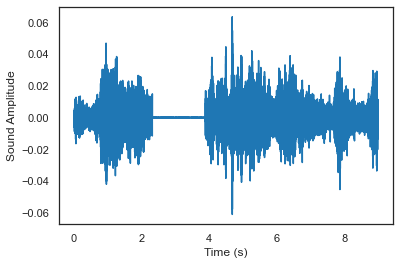

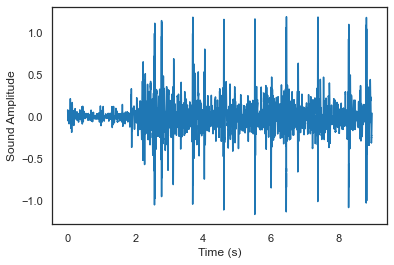

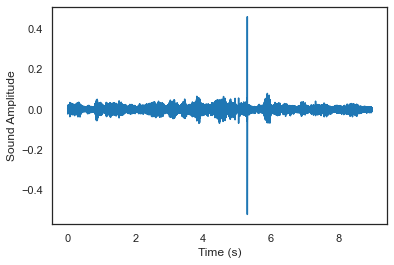

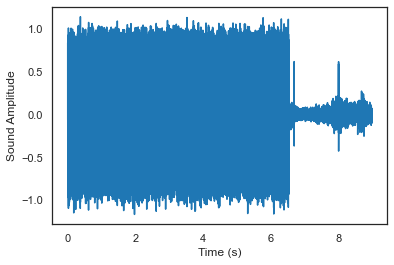

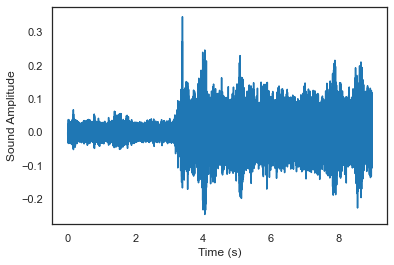

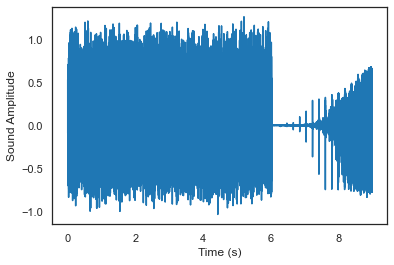

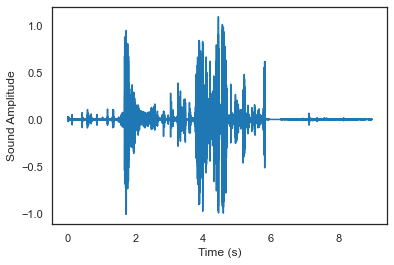

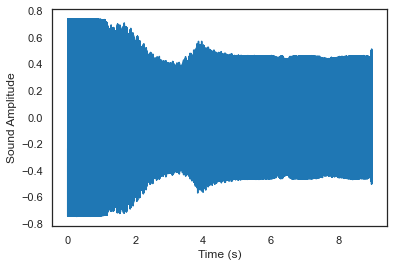

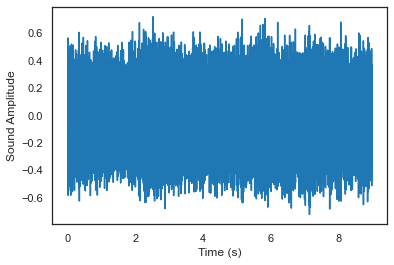

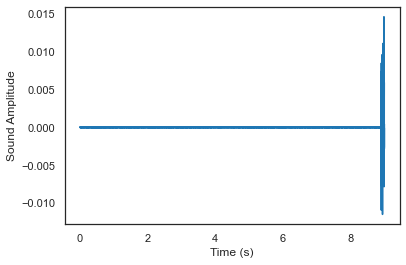

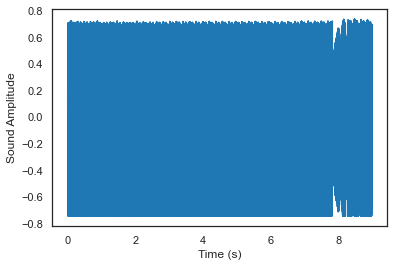

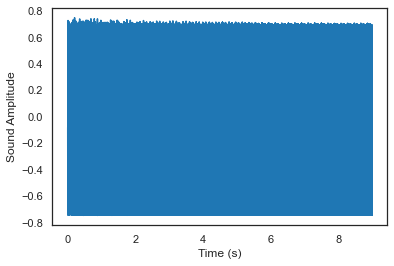

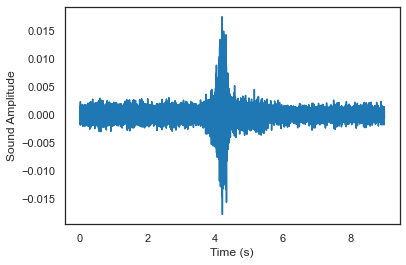

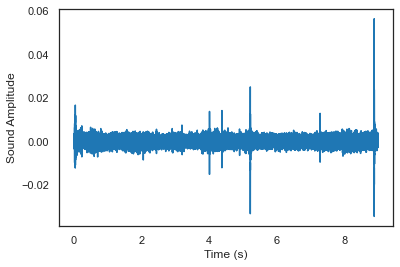

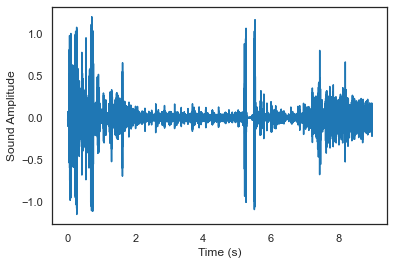

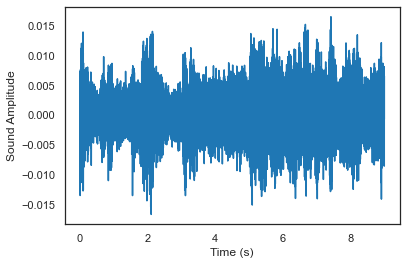

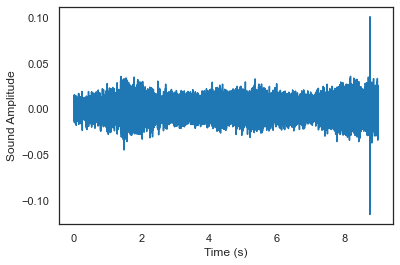

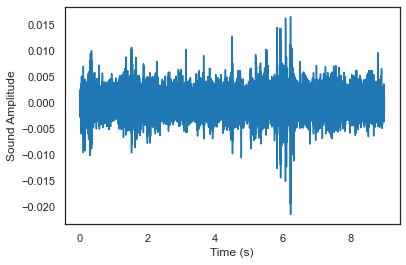

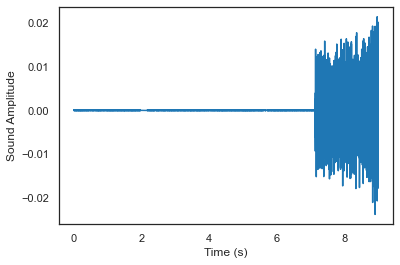

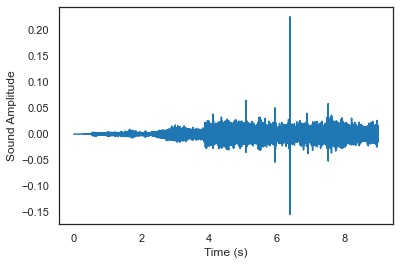

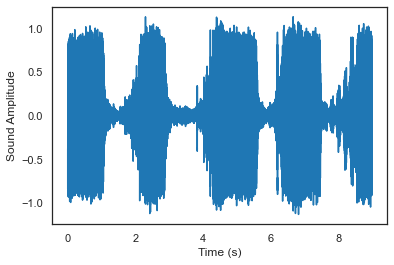

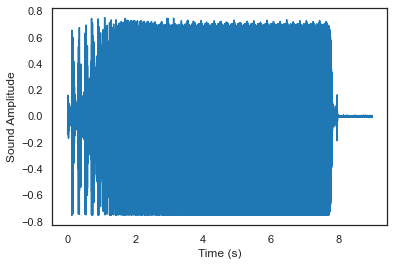

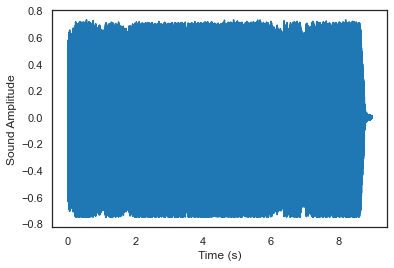

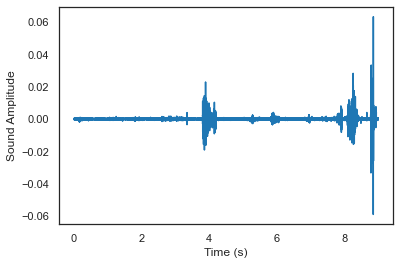

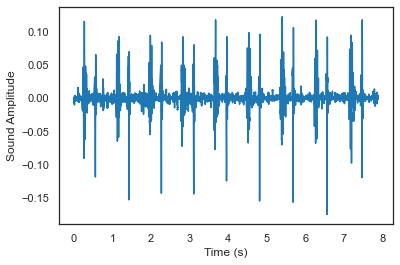

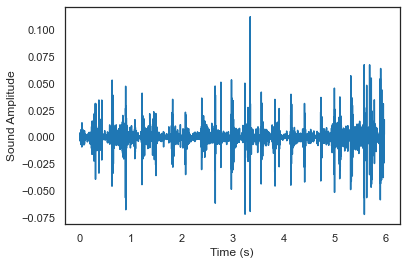

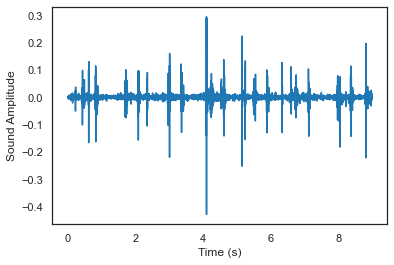

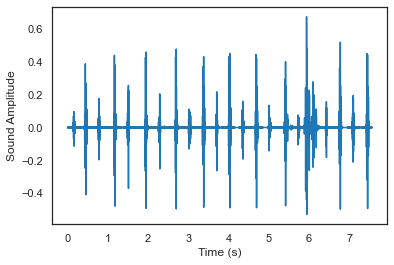

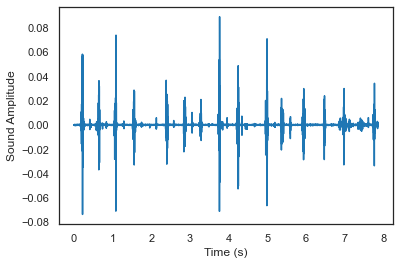

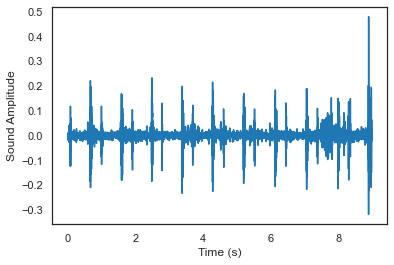

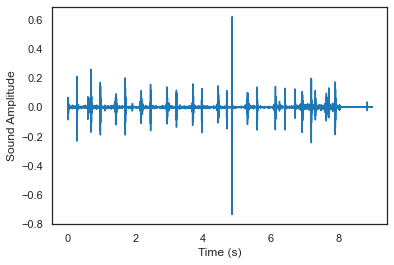

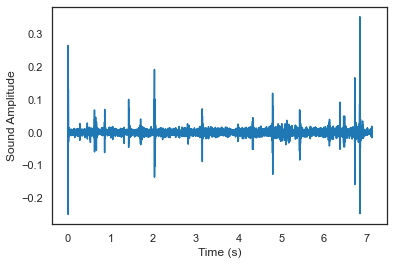

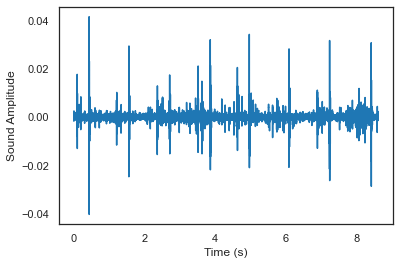

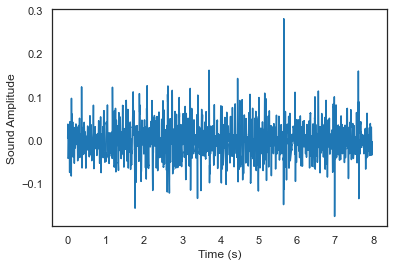

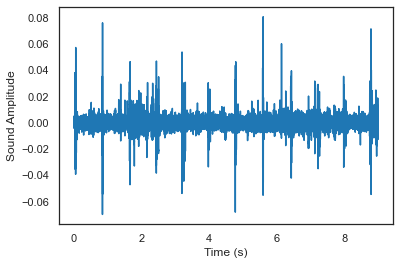

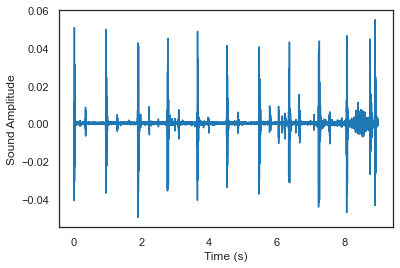

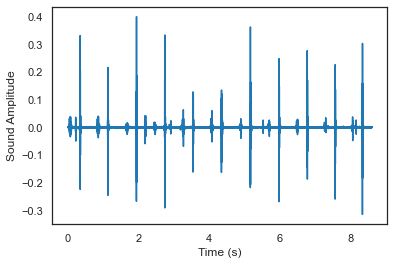

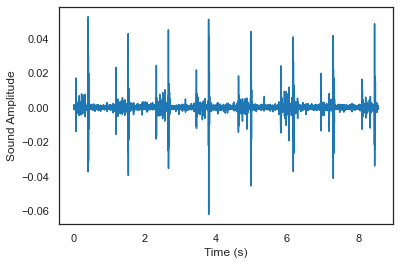

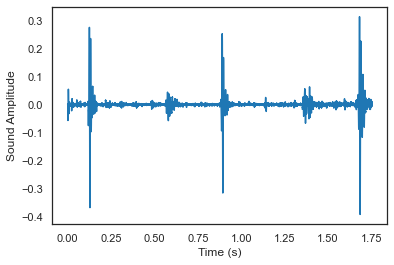

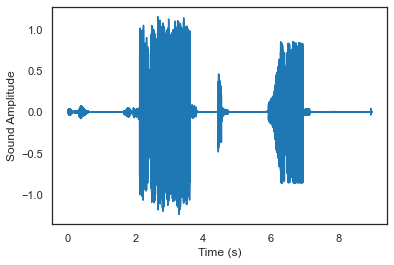

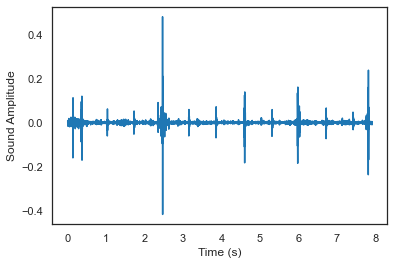

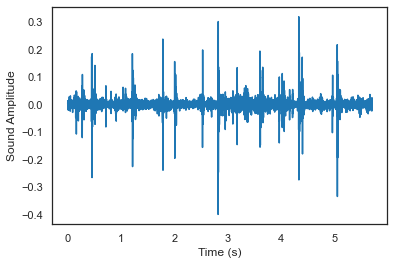

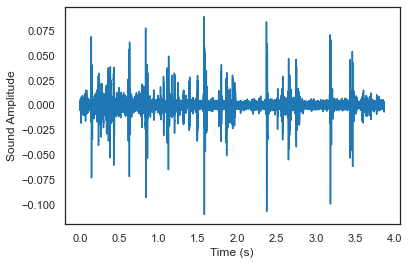

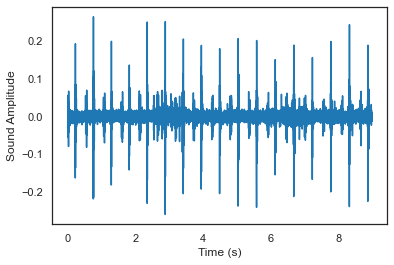

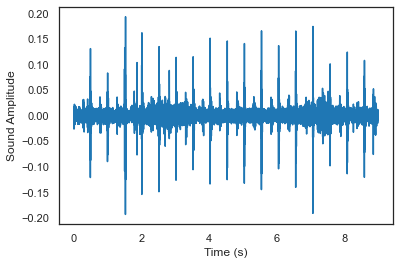

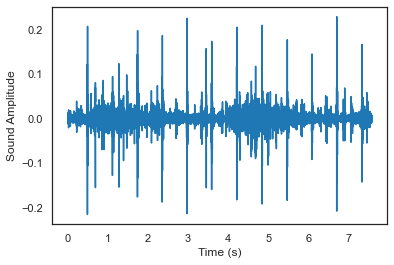

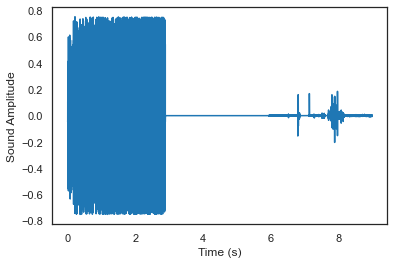

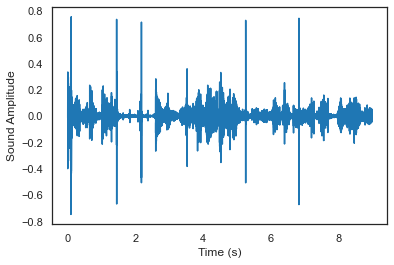

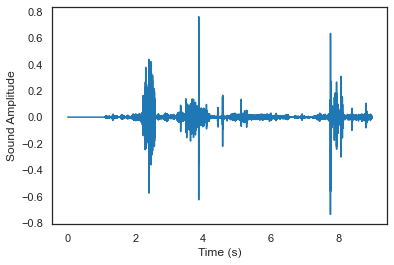

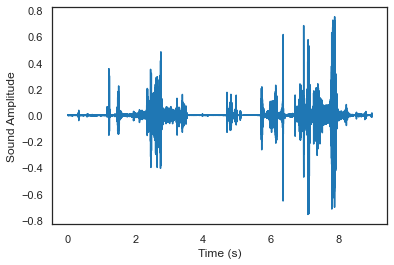

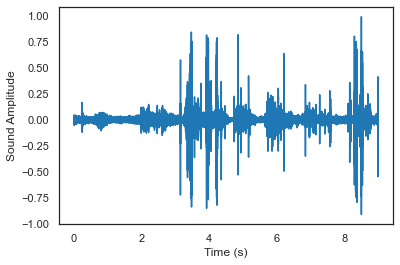

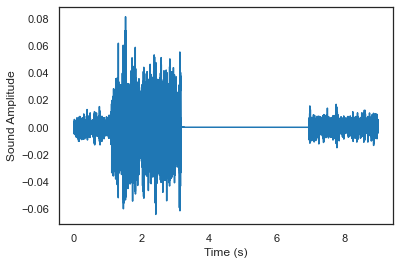

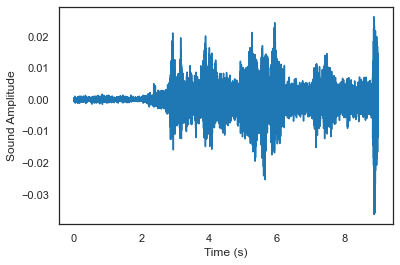

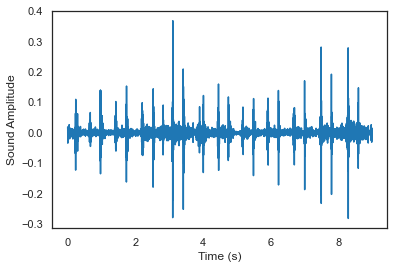

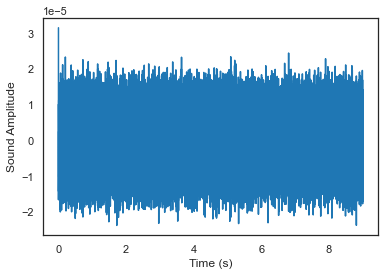

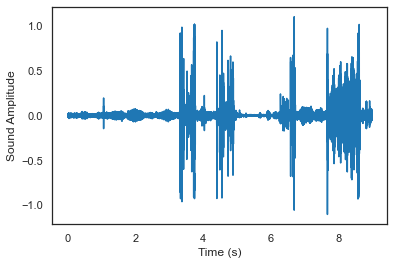

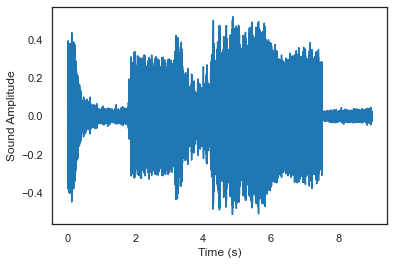

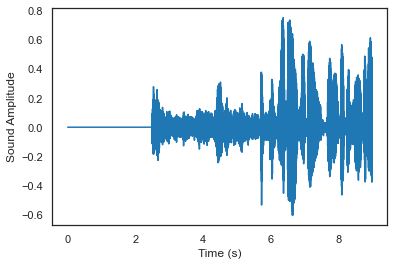

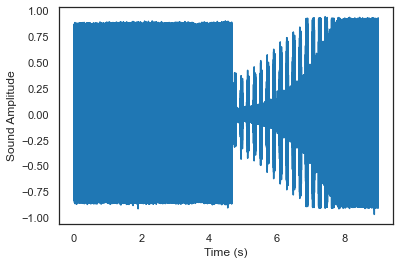

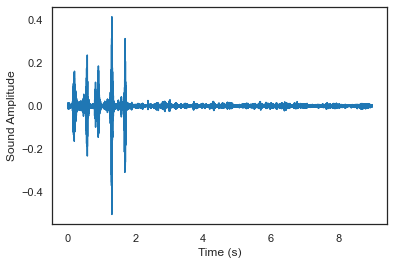

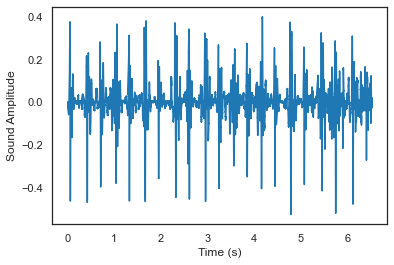

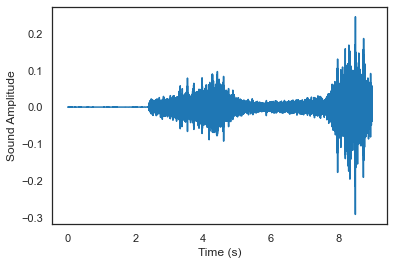

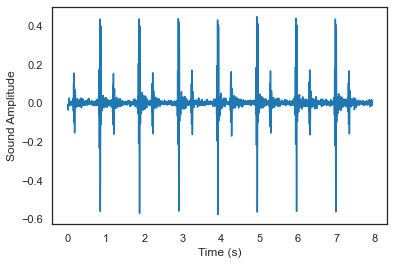

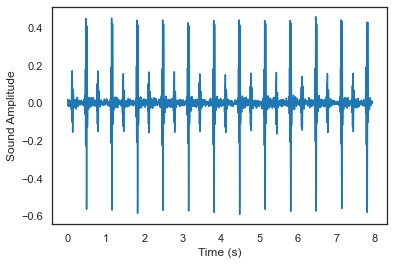

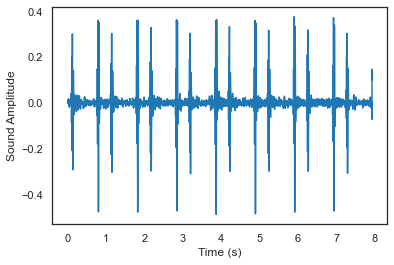

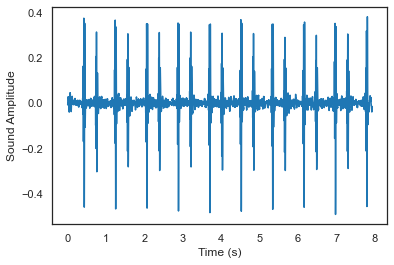

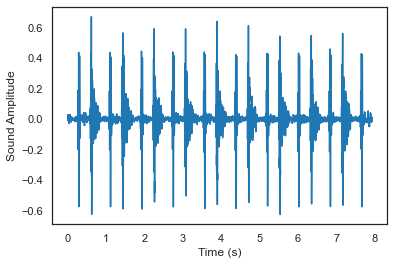

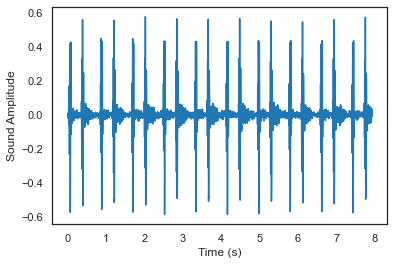

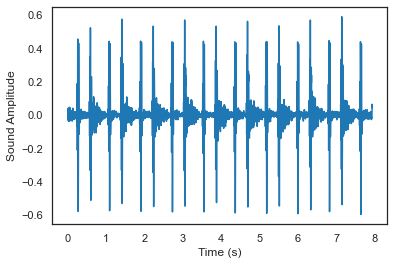

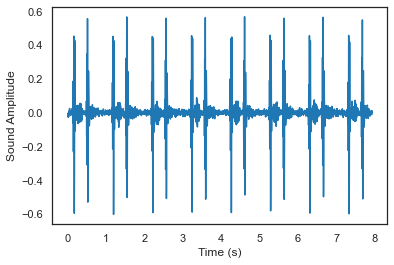

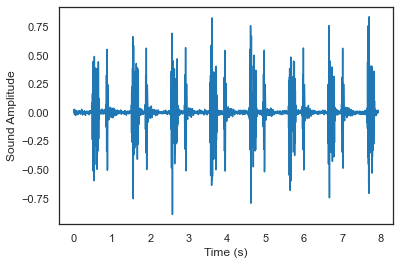

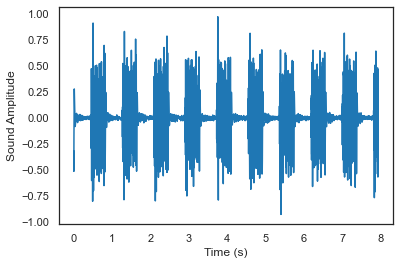

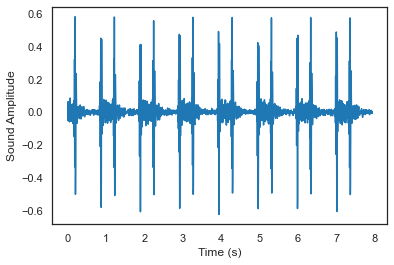

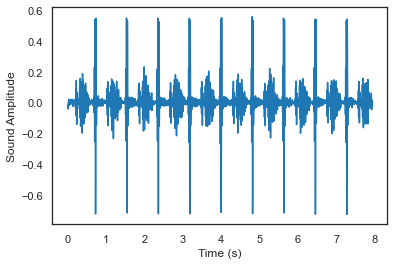

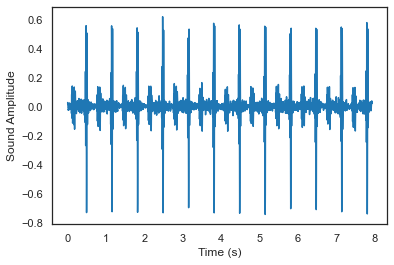

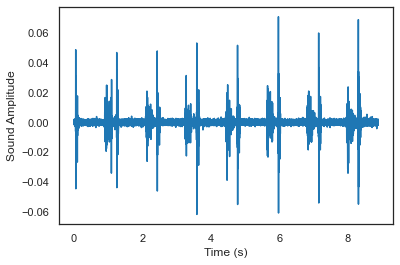

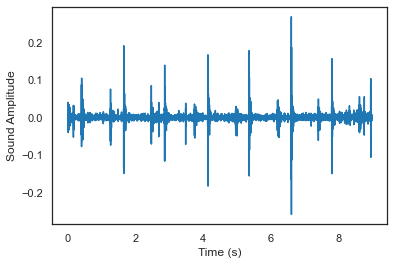

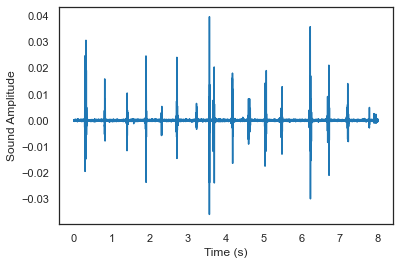

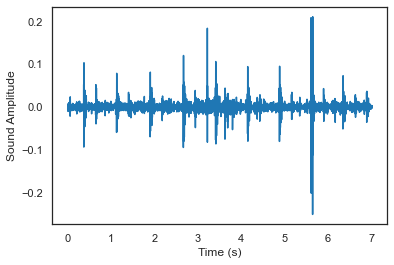

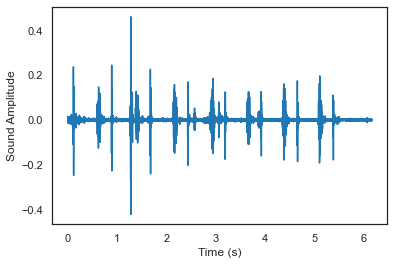

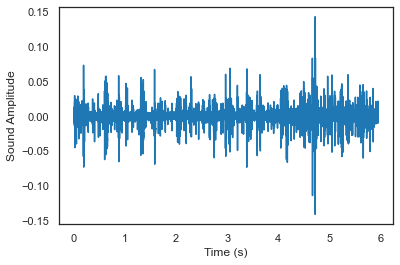

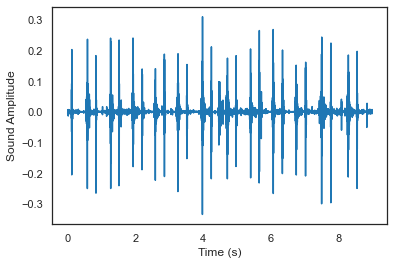

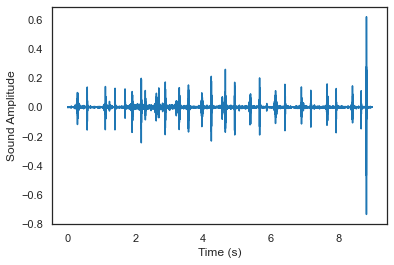

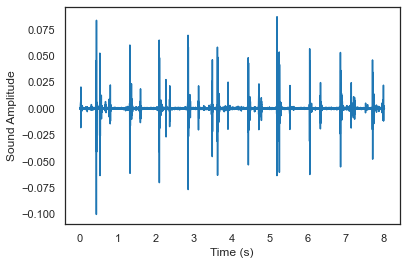

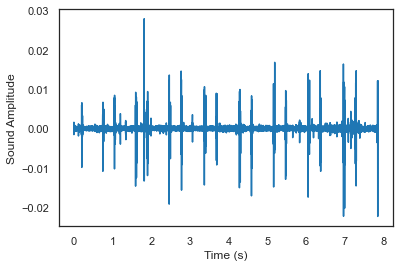

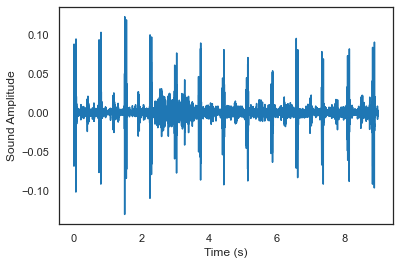

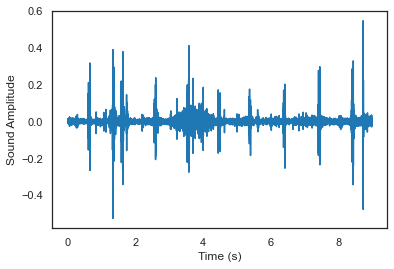

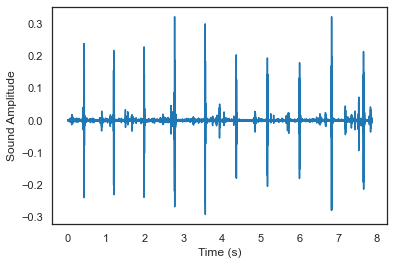

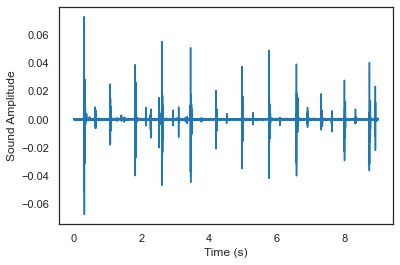

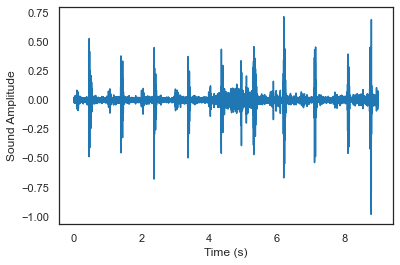

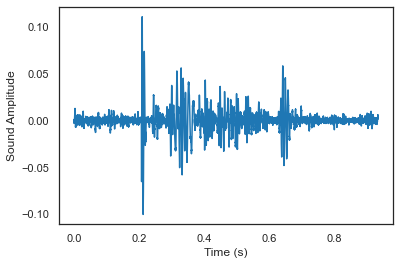

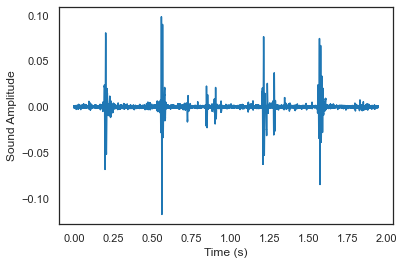

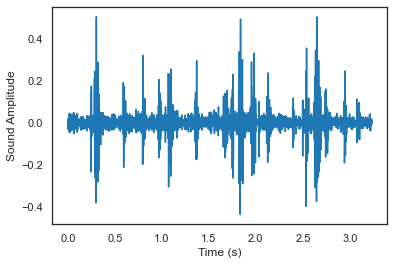

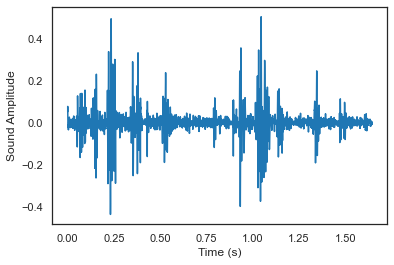

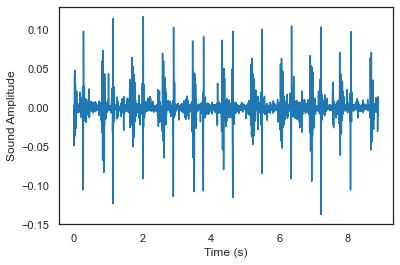

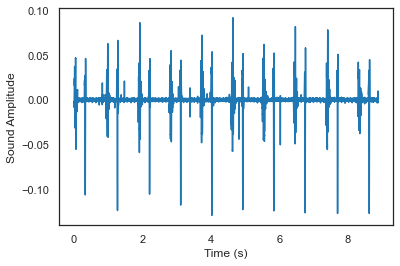

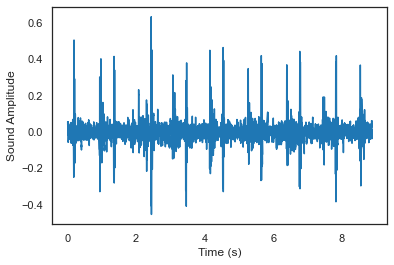

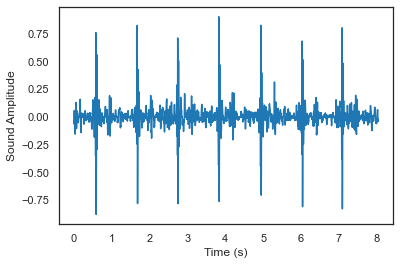

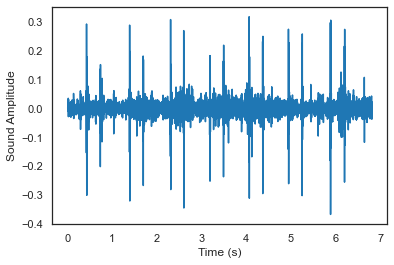

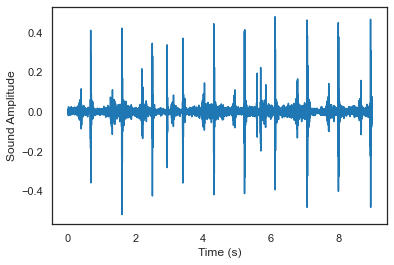

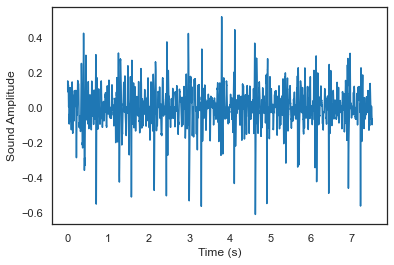

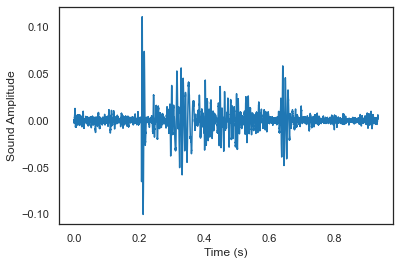

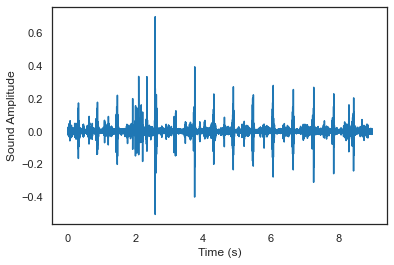

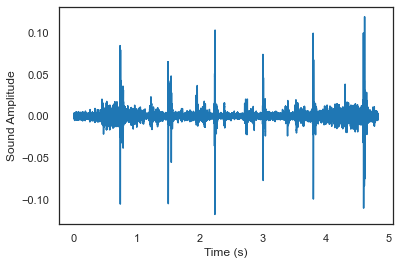

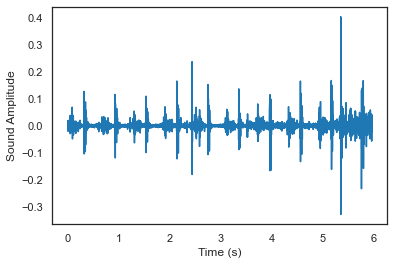

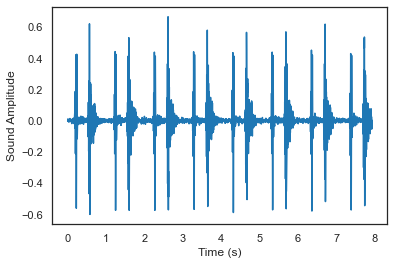

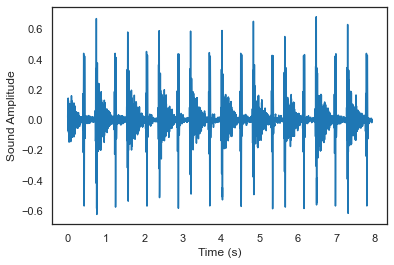

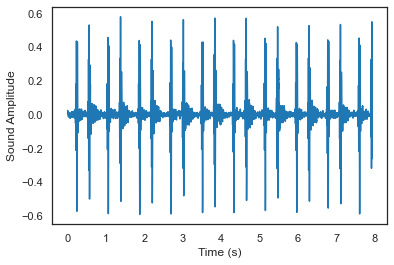

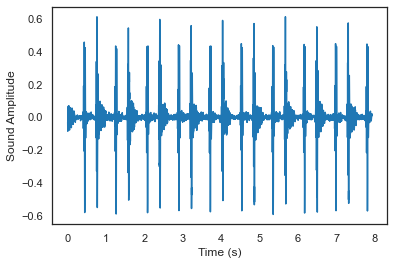

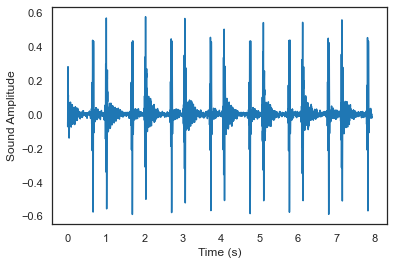

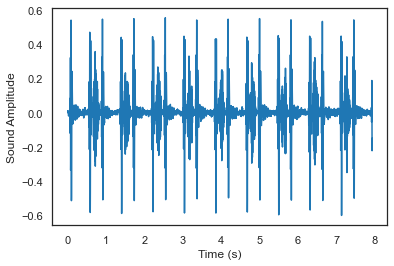

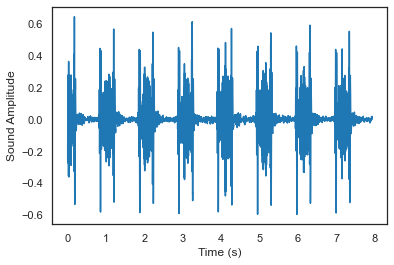

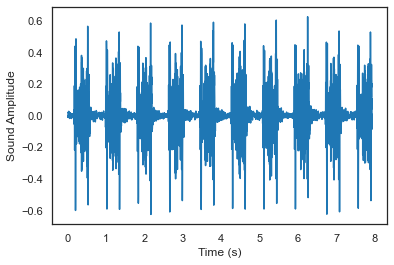

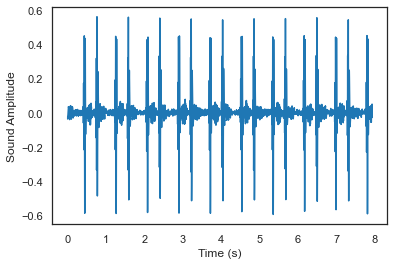

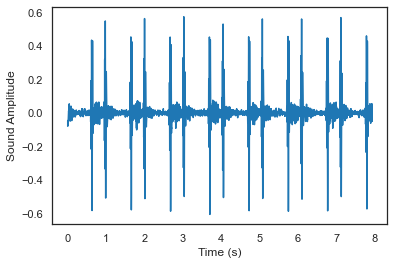

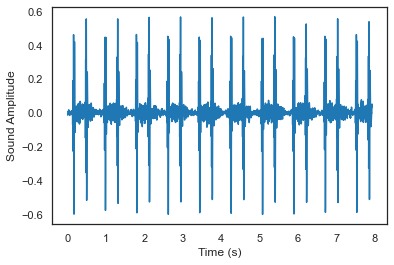

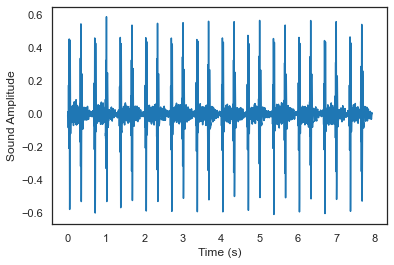

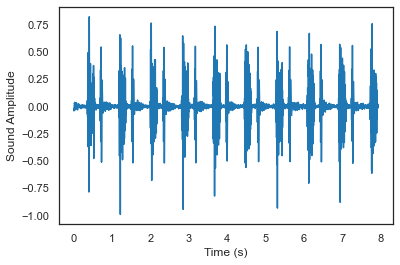

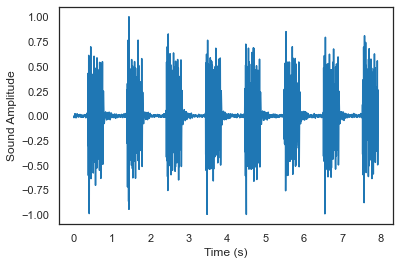

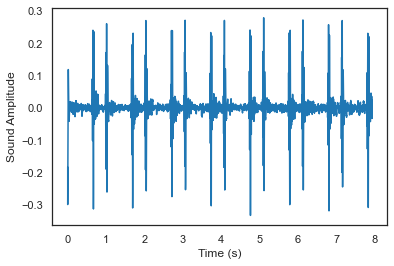

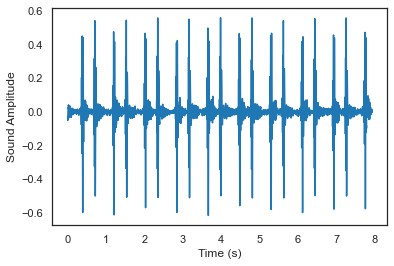

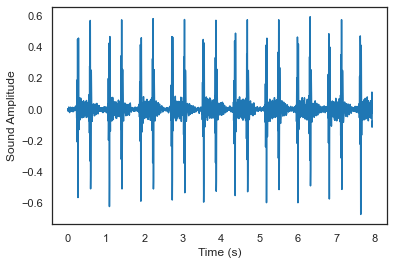

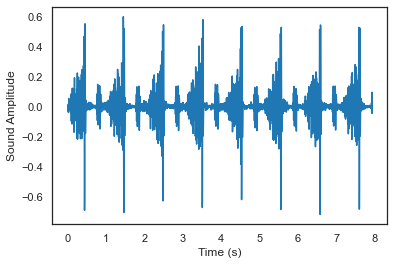

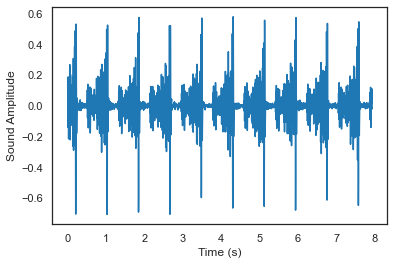

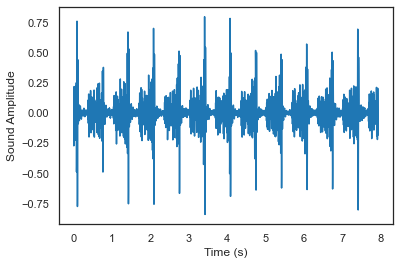

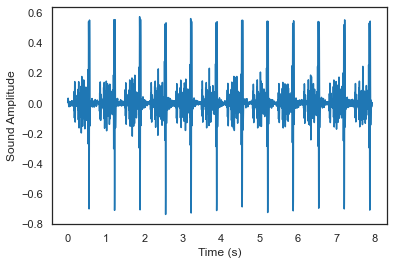

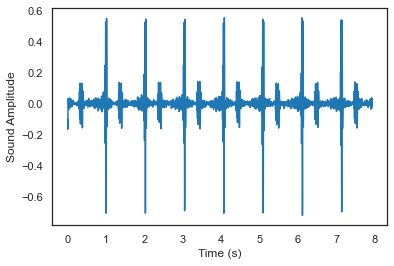

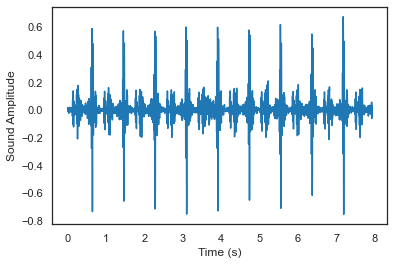

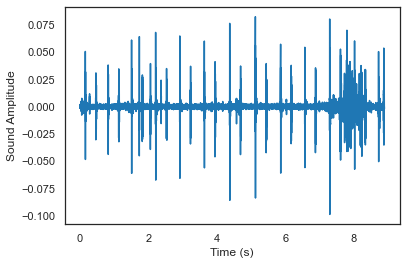

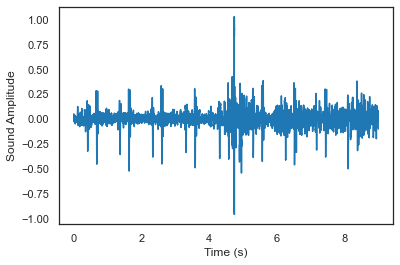

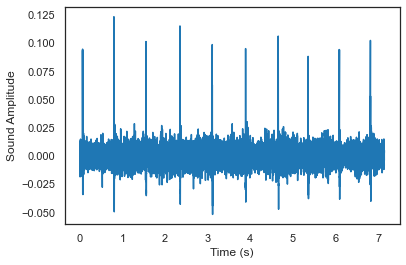

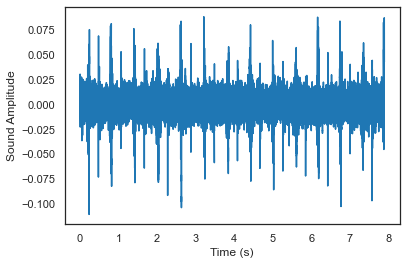

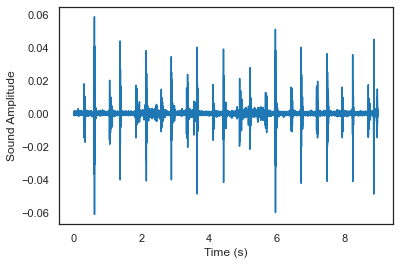

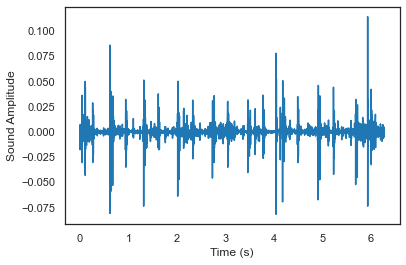

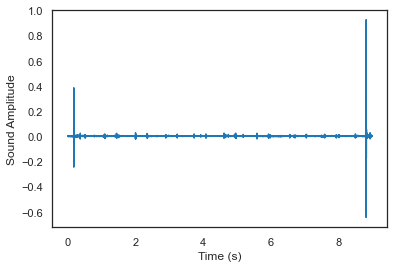

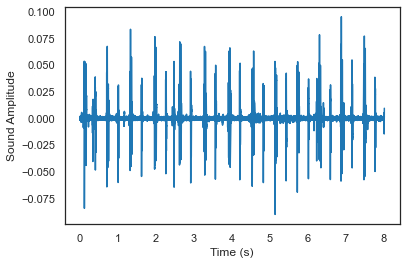

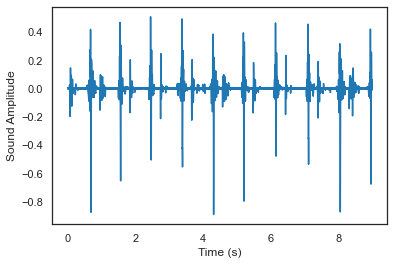

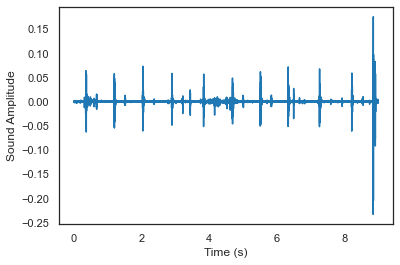

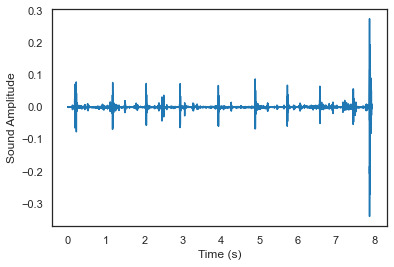

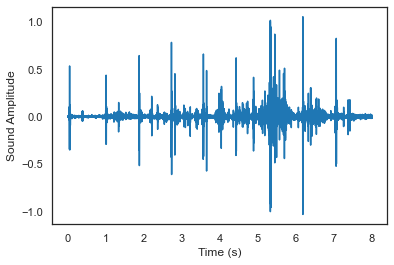

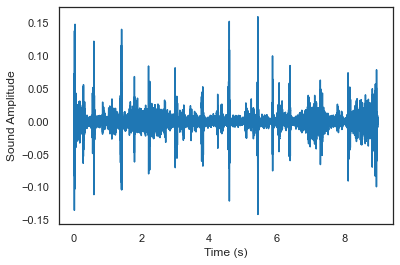

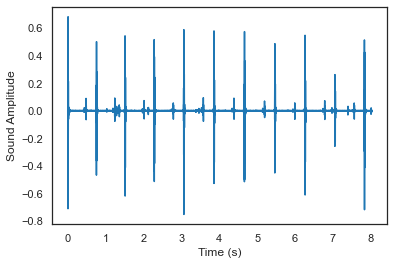

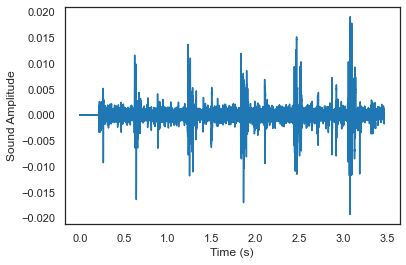

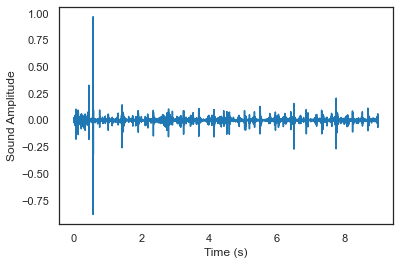

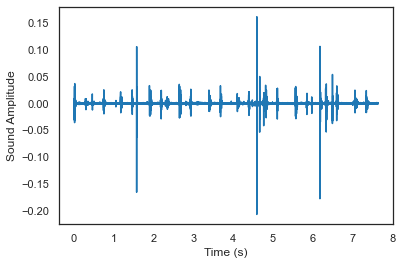

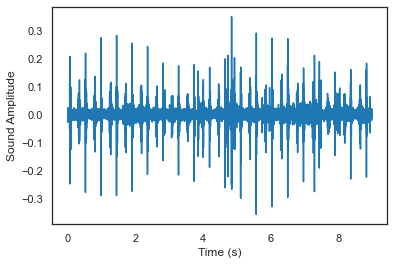

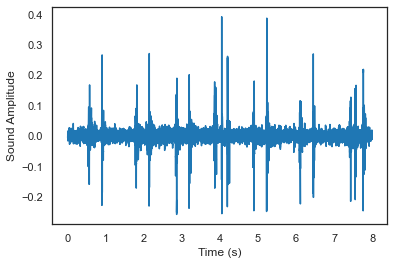

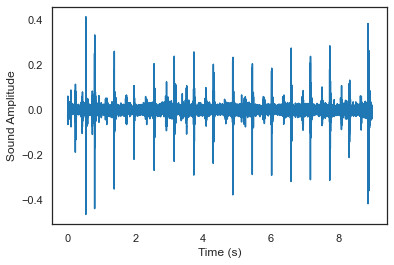

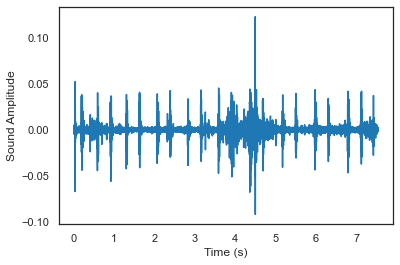

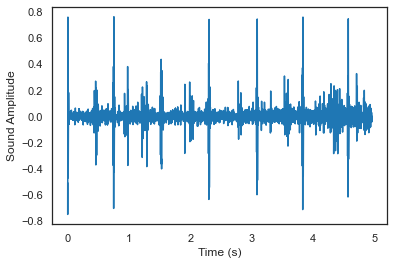

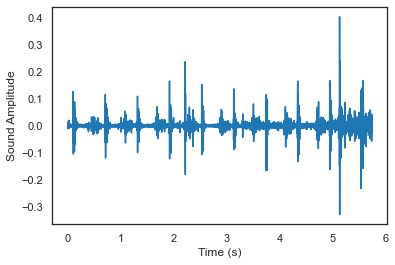

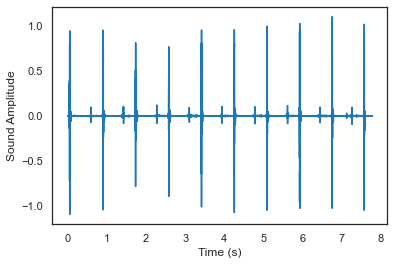

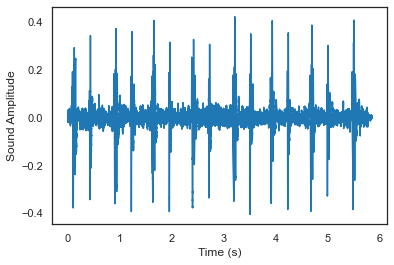

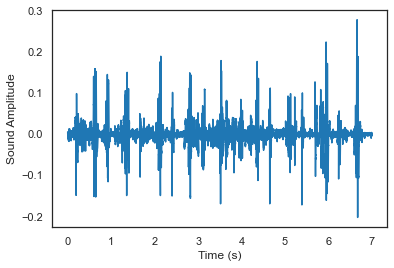

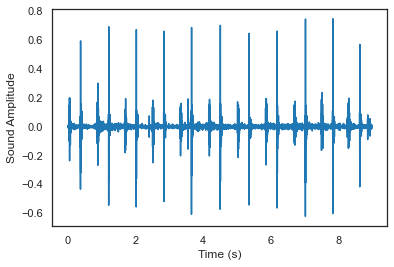

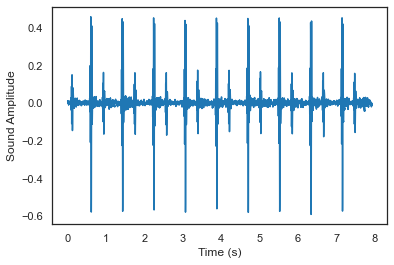

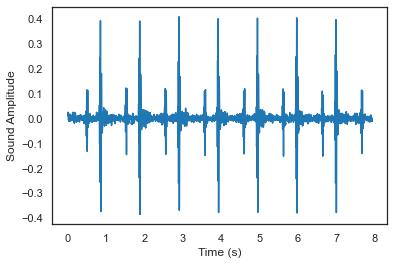

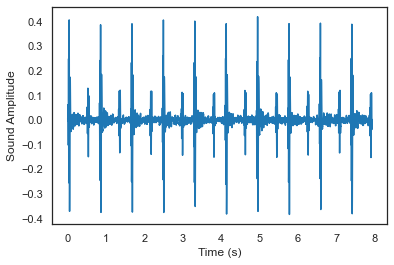

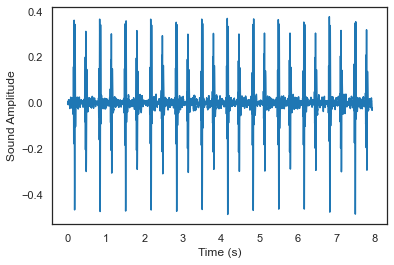

In [12]:
#read all audio files
for file in range(0, len(audio_files), 1):
    #read audio file, set time array
    audio, sfreq = lr.load(audio_files[file])
    time = np.arange(0, len(audio))/sfreq
    
    #plot audio over time
    fig, ax = plt.subplots()
    ax.plot(time,audio)
    ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
    plt.show()

In [13]:
# Play audio file
ipd.Audio(audio_files[0])

In [14]:
y, sr = lr.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 1.7974555e-05 -1.2652791e-04 -1.8209284e-04 -1.6800014e-04
 -4.4603421e-05  9.0728157e-05  1.0475767e-04 -2.5756663e-05
 -1.6550087e-04 -1.9898589e-04]
shape y: (198450,)
sr: 22050


In [16]:
#pd.Series(y).plot(figsize=(10, 5),
 #                 lw=1,
  #                title='Raw Audio Example',
   #              color=color_pal[0])
#plt.show()

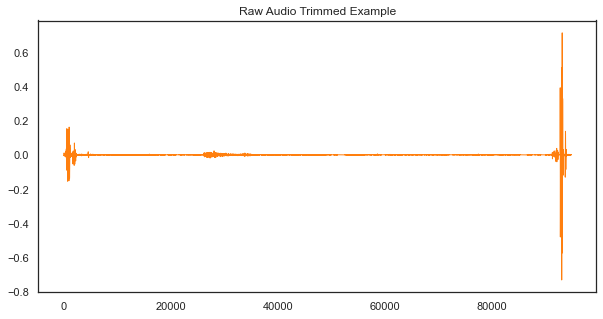

In [17]:
# Trimming leading/lagging silence
y_trimmed, _ = lr.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

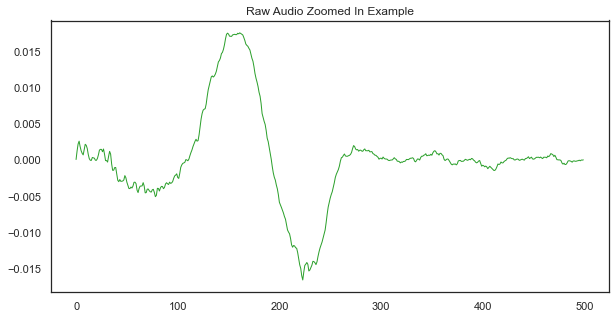

In [18]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectogram

In [19]:
D = lr.stft(y)
S_db = lr.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 388)

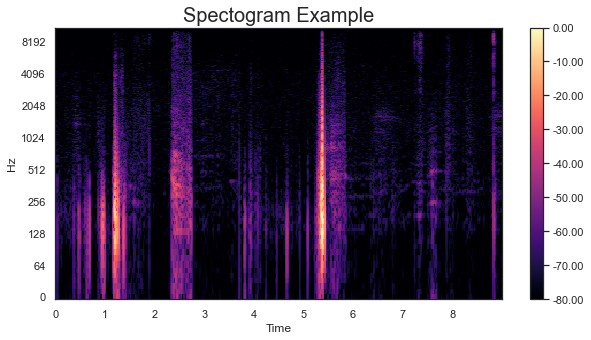

In [20]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = lr.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [22]:
S = lr.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = lr.amplitude_to_db(S, ref=np.max)

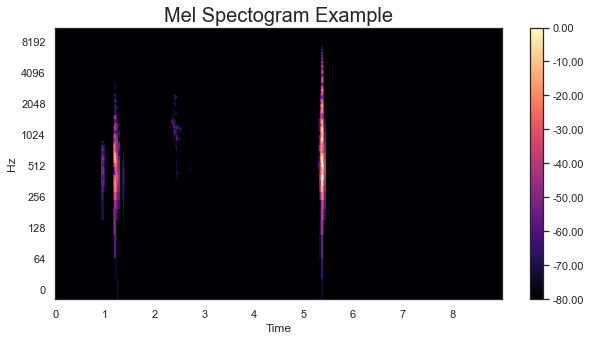

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = lr.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()